In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib as mpl

In [5]:
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf

In [7]:
from tensorflow import keras

In [8]:
keras.__version__

'2.8.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
tf.__version__

'2.8.0'

In [11]:
tf.__version__

'2.8.0'

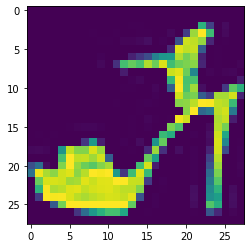

In [12]:
plt.imshow(x_train_full[9])

In [13]:
y_train_full[9]

5

In [14]:
class_names = ["T-Shirt/Top", "Trouser", "Pull_over", "Dress", "Coat", "Sandal", "Shirt", 
              "Sneaker", "Bag", "Ankle_boot"]

In [15]:
class_names[y_train_full[9]]

'Sandal'

In [16]:
class_names[y_train_full[1]]

'T-Shirt/Top'

In [17]:
x_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

In [18]:
x_train_n = x_train_full/255
x_test_n = x_test/255

In [19]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test_n

In [20]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17254902, 0.21568627, 0.37647059,
        0.78823529, 0.1372549 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.23529412, 0.72156863, 0.20784314,
        0.19607843, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.35686275, 0.40784314, 0.3254902 , 0.17254902,
        0.70196078, 0.95294118, 0.83921569, 0.61176471, 0.58039216,
        0.83137255, 0.97254902, 1.        , 0.72156863, 0.15686275,
        0.3372549 , 0.42745098, 0.30588235, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29411765, 0.55686275, 0.19607843, 0.29411765, 0.23529412,
        0.08235294, 0.38431373, 0.83137255, 0.8745098 , 0.73333333,
        0.90980392, 0.8313

In [21]:
x_valid[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [22]:
np.random.seed(1)
tf.random.set_seed(1)

In [23]:
cm = keras.models.Sequential()
cm.add(keras.layers.Flatten(input_shape = [28,28]))
cm.add(keras.layers.Dense(300, activation = "relu"))
cm.add(keras.layers.Dense(100, activation = "relu"))
cm.add(keras.layers.Dense(10, activation = "softmax"))

In [24]:
cm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
cm.history

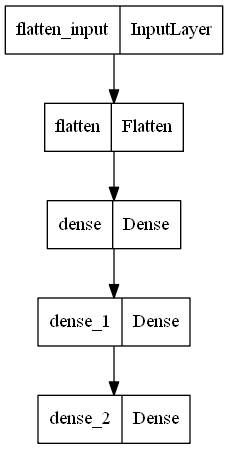

In [26]:
import pydot
keras.utils.plot_model(cm)

In [27]:
weights, biases = cm.layers[1].get_weights()

In [28]:
weights

array([[-0.04982716,  0.05973877,  0.01948842, ..., -0.07257763,
        -0.05851479,  0.04424296],
       [ 0.01499677, -0.07298556, -0.05936338, ...,  0.0493416 ,
        -0.05404767, -0.03356587],
       [-0.05879639, -0.07330709,  0.06862256, ..., -0.02101308,
        -0.01236651, -0.04332558],
       ...,
       [-0.03560071,  0.06593272, -0.04384982, ...,  0.01457816,
        -0.02349673, -0.01453468],
       [ 0.02042743, -0.03673213,  0.05241668, ..., -0.0619605 ,
         0.00912771,  0.05725372],
       [ 0.00533278, -0.00955868, -0.01690329, ..., -0.03420294,
        -0.00445458, -0.03286909]], dtype=float32)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
weights.shape

(784, 300)

In [31]:
biases.shape

(300,)

In [32]:
cm.compile(loss = "sparse_categorical_crossentropy",
          optimizer = "sgd",
          metrics = "accuracy")

In [33]:
cm_history = cm.fit(x_train, y_train, epochs = 50,
                   validation_data = (x_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7149 - accuracy: 0.7641 - val_loss: 0.5320 - val_accuracy: 0.8176
Epoch 2/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4899 - accuracy: 0.8296 - val_loss: 0.4406 - val_accuracy: 0.8506
Epoch 3/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4452 - accuracy: 0.8450 - val_loss: 0.4193 - val_accuracy: 0.8582
Epoch 4/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4181 - accuracy: 0.8546 - val_loss: 0.3954 - val_accuracy: 0.8640
Epoch 5/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3996 - accuracy: 0.8593 - val_loss: 0.3871 - val_accuracy: 0.8652
Epoch 6/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3829 - accuracy: 0.8653 - val_loss: 0.3716 - val_accuracy: 0.8716
Epoch 7/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3692 - accuracy: 0.8683 - val_loss: 0.3853 - val_accuracy:

In [34]:
cm_history.history

{'loss': [0.7148920297622681,
  0.48987385630607605,
  0.44516757130622864,
  0.4180503189563751,
  0.3995721936225891,
  0.38294634222984314,
  0.36918172240257263,
  0.35592591762542725,
  0.3452192544937134,
  0.33578208088874817,
  0.32707101106643677,
  0.3182823359966278,
  0.3113757371902466,
  0.305095911026001,
  0.29841524362564087,
  0.2919696867465973,
  0.28660693764686584,
  0.28075191378593445,
  0.27590546011924744,
  0.2700032889842987,
  0.2660490870475769,
  0.2611348628997803,
  0.2563815712928772,
  0.2522870600223541,
  0.24822954833507538,
  0.2433020919561386,
  0.2404489368200302,
  0.23504237830638885,
  0.2323153167963028,
  0.22756284475326538,
  0.22525422275066376,
  0.22107796370983124,
  0.21728098392486572,
  0.21385884284973145,
  0.21165528893470764,
  0.20754891633987427,
  0.2040756791830063,
  0.19961974024772644,
  0.19796301424503326,
  0.19414062798023224,
  0.19254565238952637,
  0.18850372731685638,
  0.18498021364212036,
  0.1832318902015686,

In [35]:
cm_history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

(0.0, 1.0)

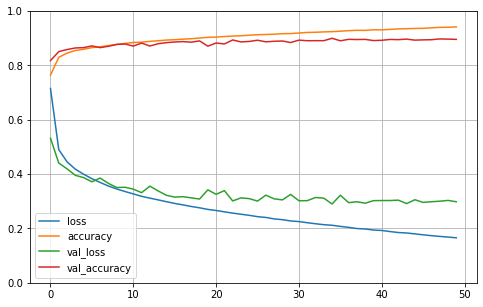

In [37]:
pd.DataFrame(cm_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [38]:
cm.evaluate(x_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.3269 - accuracy: 0.8898


[0.32690706849098206, 0.8898000121116638]

In [40]:
y_prob = cm.predict(x_test)
y_prob.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [42]:
y_prob

array([[1.2117673e-07, 1.8210768e-08, 5.7103148e-06, ..., 5.7788580e-03,
        3.3607856e-05, 9.9374443e-01],
       [8.5063381e-05, 1.7202448e-09, 9.8998570e-01, ..., 4.4336930e-12,
        1.1034521e-09, 8.0529306e-13],
       [5.9490588e-08, 9.9999964e-01, 4.3583785e-09, ..., 1.4751363e-10,
        2.9908240e-10, 4.3078124e-14],
       ...,
       [2.8680879e-04, 7.2205734e-07, 2.9812535e-04, ..., 2.4852261e-06,
        9.9894542e-01, 3.1520639e-08],
       [6.3753614e-06, 9.9996865e-01, 5.4007774e-07, ..., 1.0778981e-08,
        3.6781098e-09, 6.2703457e-08],
       [1.3103424e-06, 1.6370519e-06, 1.0955083e-05, ..., 3.0713102e-03,
        1.1644351e-04, 8.1981816e-06]], dtype=float32)

In [43]:
y_prob2 = cm.predict(x_test[:7])
y_prob2.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.26, 0.  , 0.02, 0.  , 0.  , 0.  , 0.72, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)